In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from math import sqrt
from scipy.stats import t
from pylab import *

In [39]:
data = np.loadtxt('smoking.txt')

In [40]:
# divide the dataset into two groups consisting of smokers and non-smokers
smoker = data[data[:,4] == 1] # select rows where fifith column = 0
nonsmoker = data[data[:,4] == 0] # select rows where fifith column = 1
print(smoker.shape)
print(nonsmoker.shape)

(65, 6)
(589, 6)


In [41]:
#Computing the average lungfunction, measured in FEV1, among the smokers and among the non-smokers
smoker_mean = np.mean(smoker[:,1])
non_smoker_mean = np.mean(nonsmoker[:,1])
print('Mean of FEV1-Smoker:', smoker_mean)
print('Mean of FEV1-NonSmoker:', non_smoker_mean)

Mean of FEV1-Smoker: 3.2768615384615383
Mean of FEV1-NonSmoker: 2.5661426146010187


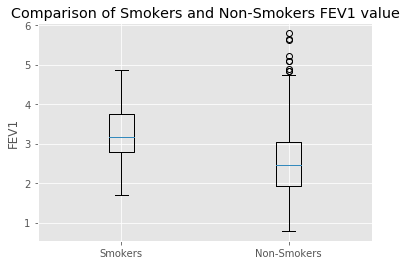

Boxplot shows that the Non-smoker group contains outliers that have an effect on the calculated meanFEV1
Outliers, which are data values that are far away from other data values, can strongly affect your results


In [42]:
#Make a box plot of the FEV1 in the two groups.
FEV1data = (smoker[:,1]), (nonsmoker[:,1])
labels = ['Smokers', 'Non-Smokers']
plt.boxplot(FEV1data, labels=labels)
plt.ylabel('FEV1')
plt.title('Comparison of Smokers and Non-Smokers FEV1 value')
plt.show()
print('Boxplot shows that the Non-smoker group contains outliers that have an effect on the calculated meanFEV1')
print('Outliers, which are data values that are far away from other data values, can strongly affect your results')


In [43]:
#Next we will perform a hypothesis test to investigate the difference between the FEV1 level in the two populations smokers and non-smokers.
#Based on the supplied template hyptest.py, write a script that performs a two-sided t-test whose null hypothesis is that the two populations
#have the same mean. Use a significance level of α = 0.05, and return a binary response indicating acceptance or rejection of the null hypothesis.

print('H0 = Mean of smokers and non-smokers FEV1 level is the same')
print('H1 = Mean of smokers and non-smokers FEV1 level is not the same')
print('\t')
N1 = len(smoker) #Assign N1 to the Number of Smokers
N2 = len(nonsmoker) #Assign N2 to the Number of Non-Smokers
print('Number of Smokers:', len(smoker))
print('Number of Non-Smokers:', len(nonsmoker))
print('\t')
df = (N1 + N2 - 2) #calculating the degree of freedom
print ('Degree of Freedom:', df)
t_ctlval = t.ppf(0.95, df) #as the significance level is 0.05, the sigma is 0.95
print('Critical t-value:', t_ctlval)
t_value, p_value = stats.ttest_ind(smoker[:,1], nonsmoker[:,1])
print('Calculated t-statistic', t_value)
print('p-Value', p_value)
if t_value > t_ctlval: h = 'Reject H0, there is a significant difference in two sample means'
else: h = 'Reject H1, there is no significant difference in two sample means'
print('\t')
print('Conclusion: ',h)
print('\t')
print('(If the calculated t-statistic is greater than the critical t-value, the test concludes that there is a statistically significant difference between the two populations)')


H0 = Mean of smokers and non-smokers FEV1 level is the same
H1 = Mean of smokers and non-smokers FEV1 level is not the same
	
Number of Smokers: 65
Number of Non-Smokers: 589
	
Degree of Freedom: 652
Critical t-value: 1.6471940405817662
Calculated t-statistic 6.46445317259654
p-Value 1.9928459182932803e-10
	
Conclusion:  Reject H0, there is a significant difference in two sample means
	
(If the calculated t-statistic is greater than the critical t-value, the test concludes that there is a statistically significant difference between the two populations)


In [44]:
std1 = smoker[:,1].std()
std2 = nonsmoker[:,1].std()
print('Smokers FEV1 standard deviation:', std1)
print('NonSmokers FEV1 standard deviation:',std2)
print('\t')
std_N1N2 = sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / df)
print('Average standard deviation between Smokers and Non-Smokers FEV1 data:', std_N1N2)
diff_mean = smoker[:,1].mean() - nonsmoker[:,1].mean()
print('Difference of Smokers FEV1 Mean and NonSmokers FEV1 Mean:', diff_mean)
MoE = t.ppf(0.95, df) * std_N1N2 * sqrt(1/N1 + 1/N2)
print('Margin of Error:', MoE)

Smokers FEV1 standard deviation: 0.7441948230635282
NonSmokers FEV1 standard deviation: 0.8497992053058739
	
Average standard deviation between Smokers and Non-Smokers FEV1 data: 0.8400209692370695
Difference of Smokers FEV1 Mean and NonSmokers FEV1 Mean: 0.7107189238605196
Margin of Error: 0.18084622104796208


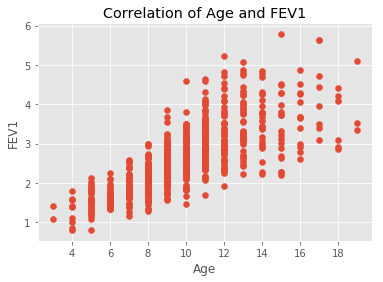

[[1.         0.75645899]
 [0.75645899 1.        ]]
	
The correlation of age and FEV1 of the whole population is 0.75645899, a positive correlation.


In [45]:
#Make a 2D plot of age versus FEV1
plt.style.use('ggplot')
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Age')
plt.ylabel('FEV1')
plt.title('Correlation of Age and FEV1')
plt.show()

#Compute the correlation of age versus  FEV1, not of Smoker and Non-Smokers but all people in the dataset
Correlation_age_FEV1 = np.corrcoef(data[:,0], data[:,1])
print(Correlation_age_FEV1)
print('\t')
print('The correlation of age and FEV1 of the whole population is 0.75645899, a positive correlation.')


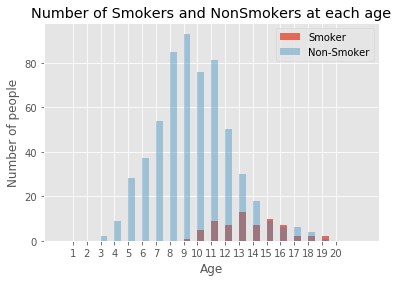

In [47]:
#Create a histogram over the age of subjects in each of the two groups smokers and non-smokers
Age_smoker = smoker[:,0]
Age_nonsmoker = nonsmoker[:,0]
bins = np.linspace(0, 22, 45)
plt.hist(Age_smoker, bins, alpha=0.8, label='Smoker')
plt.hist(Age_nonsmoker, bins, alpha=0.4, label='Non-Smoker')
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
plt.ylabel('Number of people')
plt.title('Number of Smokers and NonSmokers at each age')
plt.show()